<a href="https://colab.research.google.com/github/Listin4ever/Audio-Sentiment-Analysis/blob/main/emotional_speech_recognition_audio_process_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # PACKAGES AND LIBRARIES

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
#MUSIC PROCESS
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape,\
Conv2DTranspose, LeakyReLU, Conv1D, AveragePooling1D, MaxPooling1D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

In [25]:
!pip3 install pydub

In [28]:
!pip3 install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.6 MB/s eta 0:00:00


> # PATH, LABEL, TRANSFORMATION

#### MAIN

In [30]:
Main_WAV_Path = Path("/content/drive/MyDrive/Data/TESS Toronto emotional speech set data")

#### WAV PATH

In [31]:
Wav_Path = list(Main_WAV_Path.glob(r"**/*.wav"))

#### WAV LABELS

In [32]:
Wav_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Wav_Path))

#### TO SERIES

In [33]:
Wav_Path_Series = pd.Series(Wav_Path,name="WAV").astype(str)
Wav_Labels_Series = pd.Series(Wav_Labels,name="EMOTION")

#### TO DATAFRAME

In [34]:
Main_Wav_Data = pd.concat([Wav_Path_Series,Wav_Labels_Series],axis=1)

In [35]:
print(Main_Wav_Data.head(-1))

                                                    WAV    EMOTION
0     /content/drive/MyDrive/Data/TESS Toronto emoti...  YAF_happy
1     /content/drive/MyDrive/Data/TESS Toronto emoti...  YAF_happy
2     /content/drive/MyDrive/Data/TESS Toronto emoti...  YAF_happy
3     /content/drive/MyDrive/Data/TESS Toronto emoti...  YAF_happy
4     /content/drive/MyDrive/Data/TESS Toronto emoti...  YAF_happy
...                                                 ...        ...
5604  /content/drive/MyDrive/Data/TESS Toronto emoti...  OAF_angry
5605  /content/drive/MyDrive/Data/TESS Toronto emoti...  OAF_angry
5606  /content/drive/MyDrive/Data/TESS Toronto emoti...  OAF_angry
5607  /content/drive/MyDrive/Data/TESS Toronto emoti...  OAF_angry
5608  /content/drive/MyDrive/Data/TESS Toronto emoti...  OAF_angry

[5609 rows x 2 columns]


In [36]:
print(Main_Wav_Data["EMOTION"].value_counts())

OAF_angry                 410
YAF_happy                 400
YAF_pleasant_surprised    400
YAF_disgust               400
YAF_sad                   400
YAF_neutral               400
YAF_fear                  400
OAF_neutral               400
OAF_Sad                   400
OAF_Pleasant_surprise     400
YAF_angry                 400
OAF_Fear                  400
OAF_disgust               400
OAF_happy                 400
Name: EMOTION, dtype: int64


#### TO SHUFFLE

In [37]:
Main_Wav_Data = Main_Wav_Data.sample(frac=1).reset_index(drop=True)

In [38]:
print(Main_Wav_Data.head(-1))

                                                    WAV      EMOTION
0     /content/drive/MyDrive/Data/TESS Toronto emoti...    YAF_happy
1     /content/drive/MyDrive/Data/TESS Toronto emoti...    OAF_happy
2     /content/drive/MyDrive/Data/TESS Toronto emoti...  OAF_neutral
3     /content/drive/MyDrive/Data/TESS Toronto emoti...    OAF_happy
4     /content/drive/MyDrive/Data/TESS Toronto emoti...  OAF_disgust
...                                                 ...          ...
5604  /content/drive/MyDrive/Data/TESS Toronto emoti...  YAF_disgust
5605  /content/drive/MyDrive/Data/TESS Toronto emoti...    OAF_angry
5606  /content/drive/MyDrive/Data/TESS Toronto emoti...    YAF_angry
5607  /content/drive/MyDrive/Data/TESS Toronto emoti...    YAF_happy
5608  /content/drive/MyDrive/Data/TESS Toronto emoti...  OAF_neutral

[5609 rows x 2 columns]


> # DATA PROCESS FUNCTIONS

#### NOISE

In [39]:
def add_noise(data):
    noise_value = 0.015 * np.random.uniform() * np.amax(data)
    data = data + noise_value * np.random.normal(size=data.shape[0])

    return data

#### STRETCH

In [40]:
def stretch_process(data,rate=0.8):

    return librosa.effects.time_stretch(data,rate)

#### SHIFT

In [41]:
def shift_process(data):
    shift_range = int(np.random.uniform(low=-5,high=5) * 1000)

    return np.roll(data,shift_range)

#### PITCH

In [42]:
def pitch_process(data,sampling_rate,pitch_factor=0.7):

    return librosa.effects.pitch_shift(data,sampling_rate,pitch_factor)

#### EXTRACT FEATURES

In [43]:
def extract_process(data):

    output_result = np.array([])
    mean_zero = np.mean(librosa.feature.zero_crossing_rate(y=data).T,axis=0)
    output_result = np.hstack((output_result,mean_zero))

    stft_out = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft_out,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,chroma_stft))

    mfcc_out = np.mean(librosa.feature.mfcc(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,mfcc_out))

    root_mean_out = np.mean(librosa.feature.rms(y=data).T,axis=0)
    output_result = np.hstack((output_result,root_mean_out))

    mel_spectogram = np.mean(librosa.feature.melspectrogram(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,mel_spectogram))

    return output_result

#### EXPORT FEATURES

In [44]:
def export_process(path):

    data,sample_rate = librosa.load(path,duration=2.5,offset=0.6)

    output_1 = extract_process(data)
    result = np.array(output_1)

    noise_out = add_noise(data)
    output_2 = extract_process(noise_out)
    result = np.vstack((result,output_2))

    new_out = stretch_process(data)
    strectch_pitch = pitch_process(new_out,sample_rate)
    output_3 = extract_process(strectch_pitch)
    result = np.vstack((result,output_3))

    return result

> # ANALYSIS

#### HEARING

In [45]:
rate,speech = read(Main_Wav_Data["WAV"][2342])
print(Main_Wav_Data["EMOTION"][2342])

Audio(speech,rate=rate,autoplay=False)

YAF_happy


In [46]:
rate,speech = read(Main_Wav_Data["WAV"][3])
print(Main_Wav_Data["EMOTION"][3])

Audio(speech,rate=rate,autoplay=False)

OAF_happy


In [47]:
rate,speech = read(Main_Wav_Data["WAV"][2795])
print(Main_Wav_Data["EMOTION"][2795])

Audio(speech,rate=rate,autoplay=False)

YAF_disgust


#### SHAPE - TYPE

In [48]:
rate,speech = read(Main_Wav_Data["WAV"][2795])
print(Main_Wav_Data["EMOTION"][2795])
print(speech.shape)
print(speech.dtype)
print(rate)

YAF_disgust
(64819,)
int16
24414


In [49]:
rate,speech = read(Main_Wav_Data["WAV"][314])
print(Main_Wav_Data["EMOTION"][314])
print(speech.shape)
print(speech.dtype)
print(rate)

YAF_angry
(51310,)
int16
24414


In [50]:
rate,speech = read(Main_Wav_Data["WAV"][134])
print(Main_Wav_Data["EMOTION"][134])
print(speech.shape)
print(speech.dtype)
print(rate)

OAF_Fear
(38001,)
int16
24414


#### WAVEPLOT

In [55]:
!pip install --upgrade librosa

In [56]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][134])
librosa.display.waveplot(audio_speech,sr=rate)
Audio(audio_speech,rate=rate)

AttributeError: ignored

<Figure size 1400x500 with 0 Axes>

In [57]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][34])
librosa.display.waveplot(audio_speech,sr=rate)
Audio(audio_speech,rate=rate)

AttributeError: ignored

<Figure size 1400x500 with 0 Axes>

In [58]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][4])
librosa.display.waveplot(audio_speech,sr=rate)
Audio(audio_speech,rate=rate)

AttributeError: ignored

<Figure size 1400x500 with 0 Axes>

#### SPECSHOW

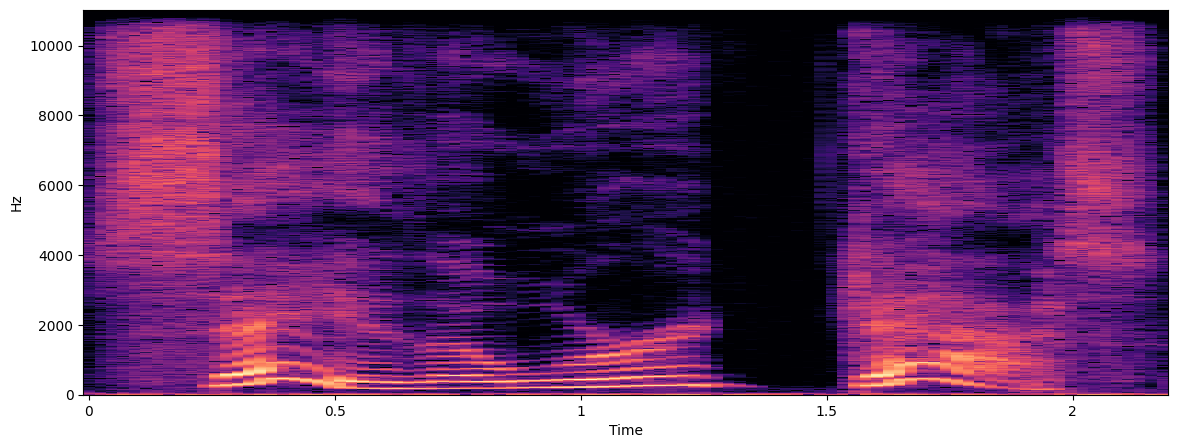

In [59]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][458])

stft_audio = librosa.stft(audio_speech)
Db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(Db_audio,sr=rate,x_axis="time",y_axis="hz")
Audio(audio_speech,rate=rate)

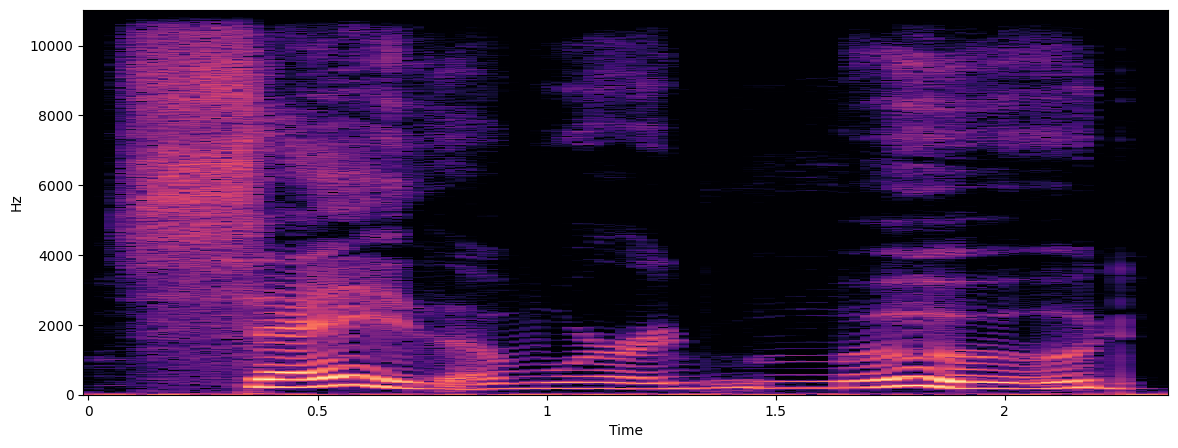

In [60]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][4])

stft_audio = librosa.stft(audio_speech)
Db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(Db_audio,sr=rate,x_axis="time",y_axis="hz")
Audio(audio_speech,rate=rate)

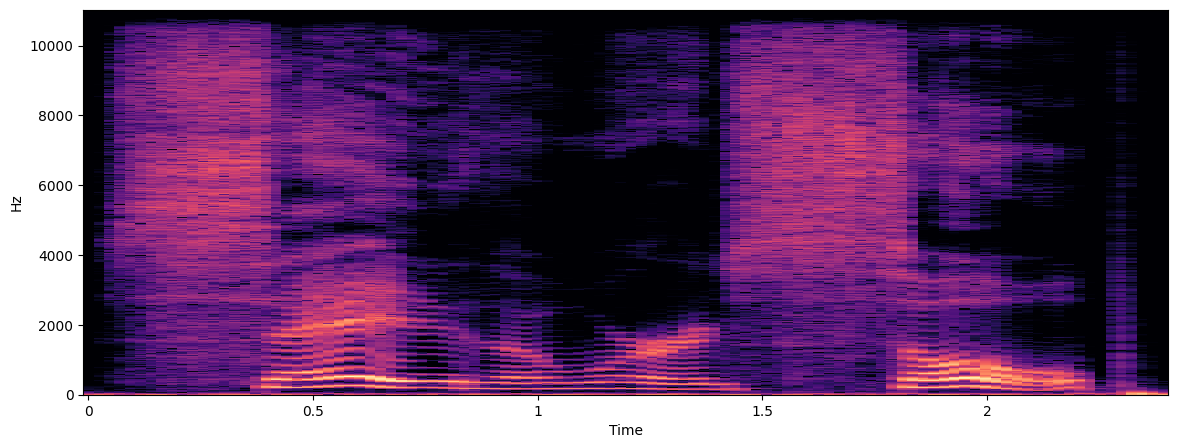

In [61]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

stft_audio = librosa.stft(audio_speech)
Db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(Db_audio,sr=rate,x_axis="time",y_axis="hz")
Audio(audio_speech,rate=rate)

#### NOISE

In [62]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

noise_injection = add_noise(audio_speech)

librosa.display.waveplot(noise_injection,sr=sample_rate)
Audio(noise_injection,rate=sample_rate)

AttributeError: ignored

<Figure size 1400x500 with 0 Axes>

#### STRETCHING

In [77]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

stretching_audio = stretch_process(audio_speech)
librosa.display.waveplot(stretching_audio,sr=sample_rate)
Audio(stretching_audio,rate=sample_rate)

TypeError: ignored

<Figure size 1400x500 with 0 Axes>

#### SHIFTING

In [64]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

shifting_audio = shift_process(audio_speech)
librosa.display.waveplot(shifting_audio,sr=sample_rate)
Audio(shifting_audio,rate=sample_rate)

AttributeError: ignored

<Figure size 1400x500 with 0 Axes>

#### PITCH

In [65]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

pitch_audio = pitch_process(audio_speech,sample_rate)
librosa.display.waveplot(pitch_audio,sr=sample_rate)
Audio(pitch_audio,rate=sample_rate)

TypeError: ignored

<Figure size 1400x500 with 0 Axes>

#### SAME TIMEFRAME PERIOD

In [66]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000],duration=2.5,offset=0.4)
librosa.display.waveplot(audio_speech,sr=sample_rate)
print(audio_speech.shape)
Audio(audio_speech,rate=sample_rate)

AttributeError: ignored

<Figure size 1400x500 with 0 Axes>

In [68]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][3],duration=2.5,offset=0.6)
librosa.display.waveplot(audio_speech,sr=sample_rate)
print(audio_speech.shape)
Audio(audio_speech,rate=sample_rate)

AttributeError: ignored

<Figure size 1400x500 with 0 Axes>

In [69]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][1398],duration=2.5,offset=0.6)
librosa.display.waveplot(audio_speech,sr=sample_rate)
print(audio_speech.shape)
Audio(audio_speech,rate=sample_rate)

AttributeError: ignored

<Figure size 1400x500 with 0 Axes>

> # DATA PROCESS AND ENGINEERING

#### TRANSFORMATION AND EXPORTATION

In [70]:
x_Train, y_Train = [],[]

for path,emotion in zip(Main_Wav_Data.WAV,Main_Wav_Data.EMOTION):

    features = export_process(path)

    for element in features:
        x_Train.append(element)
        y_Train.append(emotion)

TypeError: ignored

In [71]:
print(len(x_Train))
print(len(y_Train))
print(len(Main_Wav_Data.WAV))

0
0
5610


In [72]:
print(x_Train[0].shape)

IndexError: ignored

In [78]:
print(y_Train[0:5])

[]


In [ ]:
New_Features_Wav = pd.DataFrame(x_Train)
New_Features_Wav["EMOTIONS"] = y_Train

New_Features_Wav.to_csv("New_Wav_Set.csv",index=False)

In [ ]:
New_Features_Wav.head(-1)

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,EMOTIONS
0,0.146742,0.550979,0.488912,0.471097,0.444448,0.490337,0.506717,0.475712,0.459648,0.463982,...,0.022344,0.020355,0.012220,0.009014,0.007864,0.004775,0.002362,5.369527e-04,5.302329e-05,YAF_fear
1,0.146687,0.549818,0.488844,0.471887,0.446398,0.491342,0.507784,0.477216,0.461484,0.465184,...,0.022339,0.020351,0.012212,0.009006,0.007857,0.004775,0.002365,5.417217e-04,5.416232e-05,YAF_fear
2,0.168324,0.533118,0.546109,0.467071,0.475777,0.439014,0.451078,0.494092,0.497906,0.509959,...,0.009048,0.006959,0.007253,0.003950,0.002890,0.001827,0.001689,2.936158e-04,1.895902e-05,YAF_fear
3,0.041740,0.354080,0.356094,0.377254,0.362184,0.452063,0.500426,0.478553,0.508610,0.540091,...,0.000039,0.000023,0.000012,0.000013,0.000017,0.000017,0.000011,2.438399e-06,1.209085e-07,OAF_happy
4,0.077450,0.485448,0.400335,0.420109,0.438059,0.453129,0.539420,0.536082,0.505566,0.536477,...,0.000080,0.000064,0.000053,0.000054,0.000059,0.000058,0.000054,4.589259e-05,4.573161e-05,OAF_happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,0.042569,0.202152,0.280875,0.424630,0.284181,0.237835,0.392447,0.585351,0.862303,0.512819,...,0.000009,0.000010,0.000025,0.000028,0.000022,0.000010,0.000004,9.051414e-07,4.163329e-07,OAF_neutral
8395,0.071481,0.266023,0.340631,0.476317,0.346974,0.314850,0.455892,0.612226,0.873158,0.541418,...,0.000032,0.000032,0.000046,0.000051,0.000045,0.000033,0.000027,2.386321e-05,2.420000e-05,OAF_neutral
8396,0.054795,0.201355,0.312750,0.518509,0.293827,0.252486,0.444554,0.589385,0.848203,0.492821,...,0.000002,0.000002,0.000003,0.000005,0.000006,0.000007,0.000003,7.927244e-07,5.009667e-07,OAF_neutral
8397,0.115001,0.285006,0.508655,0.794122,0.486934,0.327287,0.328492,0.397482,0.307788,0.332755,...,0.000536,0.000688,0.000587,0.000815,0.000530,0.000380,0.000309,1.200286e-04,9.115101e-06,OAF_Fear


In [ ]:
print(New_Features_Wav["EMOTIONS"].value_counts())

OAF_angry                 600
YAF_neutral               600
OAF_happy                 600
YAF_sad                   600
YAF_fear                  600
OAF_neutral               600
OAF_Fear                  600
YAF_angry                 600
YAF_pleasant_surprised    600
OAF_Sad                   600
OAF_disgust               600
OAF_Pleasant_surprise     600
YAF_disgust               600
YAF_happy                 600
Name: EMOTIONS, dtype: int64


#### SPLITTING

In [ ]:
encoder_label = OneHotEncoder()

In [ ]:
scaler_data = StandardScaler()

In [ ]:
X = New_Features_Wav.iloc[:,:-1].values
Y = New_Features_Wav["EMOTIONS"].values

In [ ]:
print(X.shape)
print(Y.shape)

(8400, 162)
(8400,)


In [ ]:
Y = encoder_label.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
print(Y.shape)

(8400, 14)


In [ ]:
xTrain,xTest,yTrain,yTest = train_test_split(X,Y,train_size=0.9,random_state=42,shuffle=True)

In [ ]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(7560, 162)
(7560, 14)
(840, 162)
(840, 14)


In [ ]:
xTrain = scaler_data.fit_transform(xTrain)
xTest = scaler_data.transform(xTest)

In [ ]:
print(xTrain.shape)
print(xTest.shape)

(7560, 162)
(840, 162)


In [ ]:
xTrain = np.expand_dims(xTrain,axis=2)
xTest = np.expand_dims(xTest,axis=2)

In [ ]:
print(xTrain.shape)
print(xTest.shape)

(7560, 162, 1)
(840, 162, 1)


# MODEL STRUCTURE

In [ ]:
Model=Sequential()
Model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(xTrain.shape[1], 1)))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
Model.add(Dropout(0.2))

Model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Flatten())
Model.add(Dense(units=32, activation='relu'))
Model.add(Dropout(0.3))

Model.add(Dense(units=14, activation='softmax'))

In [ ]:
Model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")

In [ ]:
Conv1D_Model = Model.fit(xTrain, yTrain, batch_size=64, epochs=50, validation_data=(xTest, yTest), callbacks=[early_stop])

Epoch 1/50
119/119 [==============================] - 31s 253ms/step - loss: 2.3617 - accuracy: 0.2112 - val_loss: 1.0546 - val_accuracy: 0.6619
Epoch 2/50
119/119 [==============================] - 29s 247ms/step - loss: 1.2943 - accuracy: 0.5573 - val_loss: 0.5522 - val_accuracy: 0.8524
Epoch 3/50
119/119 [==============================] - 29s 248ms/step - loss: 0.7814 - accuracy: 0.7257 - val_loss: 0.3731 - val_accuracy: 0.8952
Epoch 4/50
119/119 [==============================] - 30s 249ms/step - loss: 0.6111 - accuracy: 0.7877 - val_loss: 0.2177 - val_accuracy: 0.9381
Epoch 5/50
119/119 [==============================] - 29s 246ms/step - loss: 0.4708 - accuracy: 0.8358 - val_loss: 0.1818 - val_accuracy: 0.9405
Epoch 6/50
119/119 [==============================] - 30s 249ms/step - loss: 0.4021 - accuracy: 0.8579 - val_loss: 0.1306 - val_accuracy: 0.9595
Epoch 7/50
119/119 [==============================] - 29s 247ms/step - loss: 0.3359 - accuracy: 0.8809 - val_loss: 0.1154 - val_ac

<AxesSubplot:>

<Figure size 720x720 with 0 Axes>

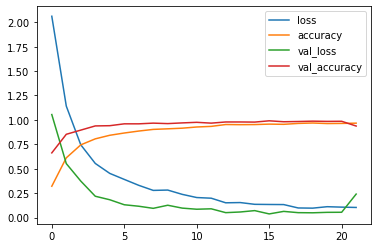

In [ ]:
Grap_Data = pd.DataFrame(Conv1D_Model.history)
figure = plt.figure(figsize=(10,10))
Grap_Data.plot()

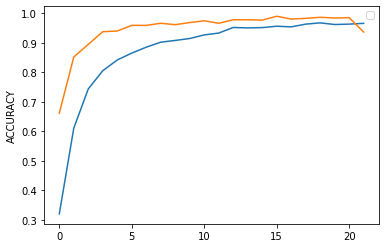

In [ ]:
plt.plot(Conv1D_Model.history["accuracy"])
plt.plot(Conv1D_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

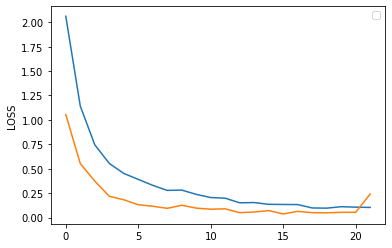

In [ ]:
plt.plot(Conv1D_Model.history["loss"])
plt.plot(Conv1D_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

#### PREDICTION

In [ ]:
Model_Results = Model.evaluate(xTest,yTest)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.4f" % Model_Results[1])

27/27 [==============================] - 1s 26ms/step - loss: 0.2399 - accuracy: 0.9369
LOSS:  0.2399
ACCURACY:  0.9369


In [ ]:
prediction_test = Model.predict(xTest)
y_prediction = encoder_label.inverse_transform(prediction_test)

yTest = encoder_label.inverse_transform(yTest)

In [ ]:
print(prediction_test[0:10])

[[9.4417636e-15 5.0998176e-07 1.2445234e-15 ... 3.6347878e-06
  1.4982178e-12 9.9998355e-01]
 [5.9586274e-14 3.5202117e-13 1.6648802e-17 ... 1.0000000e+00
  4.4748080e-21 5.2322684e-25]
 [1.0328399e-08 8.3692087e-04 6.5716325e-05 ... 5.0302262e-08
  1.8276987e-06 3.7390683e-07]
 ...
 [9.1599545e-20 6.1797734e-11 4.1023420e-19 ... 7.8013345e-22
  1.0000000e+00 7.2379029e-16]
 [1.1150096e-05 3.3795209e-06 2.1805676e-14 ... 1.9392533e-07
  6.6561548e-11 6.3363343e-14]
 [6.5207637e-08 8.5030094e-04 8.5000518e-13 ... 5.0688190e-14
  1.4344141e-09 6.5682177e-17]]


In [ ]:
print(y_prediction[0:10])

[['YAF_sad']
 ['YAF_neutral']
 ['OAF_disgust']
 ['YAF_pleasant_surprised']
 ['YAF_fear']
 ['YAF_sad']
 ['OAF_happy']
 ['YAF_sad']
 ['OAF_Pleasant_surprise']
 ['YAF_neutral']]


In [ ]:
print(yTest[0:10])

[['YAF_sad']
 ['YAF_neutral']
 ['OAF_disgust']
 ['YAF_pleasant_surprised']
 ['YAF_fear']
 ['YAF_sad']
 ['OAF_happy']
 ['YAF_sad']
 ['OAF_Pleasant_surprise']
 ['YAF_neutral']]


In [ ]:
conf_matrix = confusion_matrix(yTest, y_prediction)

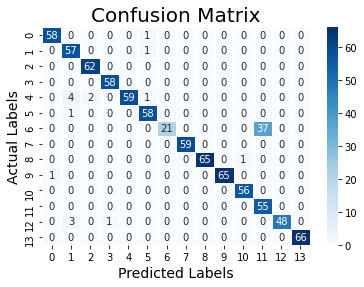

In [ ]:
sns.heatmap(conf_matrix, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')

plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(yTest, y_prediction))

                        precision    recall  f1-score   support

              OAF_Fear       0.98      0.98      0.98        59
 OAF_Pleasant_surprise       0.88      0.98      0.93        58
               OAF_Sad       0.97      1.00      0.98        62
             OAF_angry       0.98      1.00      0.99        58
           OAF_disgust       1.00      0.89      0.94        66
             OAF_happy       0.95      0.98      0.97        59
           OAF_neutral       1.00      0.36      0.53        58
             YAF_angry       1.00      1.00      1.00        59
           YAF_disgust       1.00      0.98      0.99        66
              YAF_fear       1.00      0.98      0.99        66
             YAF_happy       0.98      1.00      0.99        56
           YAF_neutral       0.60      1.00      0.75        55
YAF_pleasant_surprised       1.00      0.92      0.96        52
               YAF_sad       1.00      1.00      1.00        66

              accuracy                

In [ ]:
print(accuracy_score(yTest, y_prediction))

0.9369047619047619


#### SPECIAL PREDICTION

In [ ]:
new_predict_list = []
feat_new = export_process("../input/audio-speech-sentiment/TRAIN/10.wav")

for feat in feat_new:
    new_predict_list.append(feat)

In [ ]:
print(new_predict_list[0].shape)

(162,)


In [ ]:
New_Predict_Feat = pd.DataFrame(new_predict_list)

In [ ]:
New_Predict_Feat = scaler_data.fit_transform(New_Predict_Feat)
New_Predict_Feat = np.expand_dims(New_Predict_Feat,axis=2)

In [ ]:
print(New_Predict_Feat.shape)

(3, 162, 1)


In [ ]:
prediction_nonseen = Model.predict(New_Predict_Feat)
arg_prediction_nonseen = prediction_nonseen.argmax(axis=-1)
y_prediction_nonseen = encoder_label.inverse_transform(prediction_nonseen)


In [ ]:
print(arg_prediction_nonseen)
print(y_prediction_nonseen)

[1 7 3]
[['OAF_Pleasant_surprise']
 ['YAF_angry']
 ['OAF_angry']]
